In [25]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Goal of the model
The goal is to train a Convolutional Neural Network that can classify happy or sad emoji images up to an accuracy of 99.9%

# Dataset Details
The dataset consists of 80 happy and sad emoji images in their own folders. The dataset is in a zip file at the following link - https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
The images are currently not labelled but the happy images are in the happy folder and the sad images are in the sad folder.

# Solution
1. Download the images in to a directory from the link and extract them in to folders.
2. Use `ImageDataGenerator()` to label the images in the folders.
3. Use callbacks to stop the training after it reached the desired accuracy.

In [26]:
#Download the images and unzip them
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

#Define the callback function and instantiate it
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>DESIRED_ACCURACY):
      print('Reached 99.9% accuracy so cancelling training!')
      self.model.stop_training = True

callbacks = myCallback()

--2021-03-22 05:36:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.164.144, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2021-03-22 05:36:05 (218 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [27]:
# Print sample file names in each directory
train_happy_dir = os.path.join('/tmp/h-or-s/happy')
train_sad_dir = os.path.join('/tmp/h-or-s/sad')
train_happy_names = os.listdir(train_happy_dir)
train_sad_names = os.listdir(train_sad_dir)
print('\n File names of happy images are : {}'.format(train_happy_names[:10]))
print('\n File names of sad images are : {}'.format(train_sad_names[:10]))
print(len(train_happy_names))
print(len(train_sad_names))


 File names of happy images are : ['happy2-15.png', 'happy1-08.png', 'happy2-01.png', 'happy2-04.png', 'happy1-16.png', 'happy1-05.png', 'happy2-18.png', 'happy2-16.png', 'happy1-07.png', 'happy2-05.png']

 File names of sad images are : ['sad2-12.png', 'sad2-06.png', 'sad1-05.png', 'sad2-07.png', 'sad1-02.png', 'sad1-18.png', 'sad1-03.png', 'sad1-01.png', 'sad1-07.png', 'sad1-00.png']
40
40


(150, 150, 4)
(150, 150, 4)


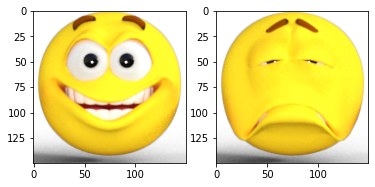

In [28]:
#Show sample images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img_happy = mpimg.imread(os.path.join(train_happy_dir, train_happy_names[39]))
img_sad = mpimg.imread(os.path.join(train_sad_dir, train_sad_names[39]))
plt.subplot(1,2,1)

print(img_happy.shape)
plt.imshow(img_happy)

plt.subplot(1,2,2)
print(img_sad.shape)
plt.imshow(img_sad)

plt.show()

In [29]:
# Define and Compile the Model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)), 
                                    tf.keras.layers.MaxPool2D((2,2)), 
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

#Define the optimizer and the loss function.
model.compile(optimizer=RMSprop(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Load the images using ImageDataGenerator() and label the images in to happy and sad classes.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-s',
    target_size=(150,150),
    batch_size=10,
    class_mode ='binary'
)

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [31]:
# Train the model. Include callbacks 
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=20,
    verbose=1,
    callbacks = [callbacks]
)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/20
8/8 [==============================] - 1s 20ms/step - loss: 27.7976 - accuracy: 0.5873
Epoch 2/20
8/8 [==============================] - 0s 20ms/step - loss: 0.9753 - accuracy: 0.5219
Epoch 3/20
8/8 [==============================] - 0s 19ms/step - loss: 0.3544 - accuracy: 0.9076
Epoch 4/20
8/8 [==============================] - 0s 19ms/step - loss: 0.5227 - accuracy: 0.8083
Epoch 5/20
8/8 [==============================] - 0s 21ms/step - loss: 0.6339 - accuracy: 0.6670
Epoch 6/20
8/8 [==============================] - 0s 20ms/step - loss: 0.2563 - accuracy: 0.9212
Epoch 7/20
8/8 [==============================] - 0s 21ms/step - loss: 0.0511 - accuracy: 1.0000
Reached 99.9% accuracy so cancelling training!
